## Processing with biomass data of other authors

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["LN_GS_cub_m", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_GS_cub_m                                                         \
                 count      mean       std   min     25%    50%     75%   max   
Species_ID                                                                      
0                458.0  5.192052  0.897136  0.88  4.8350  5.415  5.8075  6.60   
1                  7.0  5.490000  0.589463  4.65  5.0350  5.700  5.9650  6.08   
2                120.0  4.741667  0.702628  2.31  4.2150  4.855  5.3025  5.92   
3                115.0  5.345478  0.624346  3.32  4.9250  5.500  5.8000  6.31   
4                 66.0  5.057273  0.732497  3.05  4.6175  5.010  5.6675  6.26   
5                 91.0  5.430220  0.830515  2.20  5.0700  5.610  6.0300  6.40   

           ALL_STEM_t_ha                                                       \
                   count        mean        std   min     25%    50%      75%   
Species_ID                                                                      
0                  457.0   97.049891  61.854506   1.8  47.500   92.7  135.900   
1                    7.0  123.814286  61.879895  46.3  70.650  133.9  174.550   
2                  120.0   74.495000  44.523333   5.1  37.275   68.1  103.075   
3                  115.0  107.607826  55.589186  11.0  62.700  106.8  145.450   
4                   66.0   84.946970  58.875162   8.2  40.750   61.2  125.000   
5                   90.0  173.065556  99.100647   5.0  93.075  161.3  253.375   

                   
              max  
Species_ID         
0           310.7  
1           196.1  
2           193.5  
3           251.6  
4           245.4  
5           363.9

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [7]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha'])
y = pd.DataFrame(select, columns= ['GS_cub_m'])

In [8]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
0,0,0.0,9.7,14.6,9.7
1,0,0.0,20.6,20.6,32.2
2,0,0.0,13.6,15.4,35.2
3,0,0.0,23.3,22.2,29.6
4,0,0.0,15.6,16.4,20.4


In [9]:
# Columns in "y" data collections
y.head()

,GS_cub_m
0,43.9
1,254.0
2,190.0
3,277.7
4,142.5


# Create first XGBoost model for estimate varibiality of output stats

In [10]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [11]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [12]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [13]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.9661704711446814, 0.9648064819981592, 0.9606321153595511]
    Mean: 0.964
    Std: 0.002

 --------------------
Root-mean-square error (RMSE): 

    Scores: [33.91448518 23.94089668 27.40078915]
    Mean: 28.419
    Std: 4.135

 --------------------
Mean absolute error (MAE): 

    Scores: [17.222664216848518, 15.323027732822446, 16.076852364791065]
    Mean: 16.208
    Std: 0.781

 --------------------


# Add optimal hyperparameters for XGBoost model

In [14]:
# Hyperparameters data for the next step/stage
p1 = 0.8829191872975016               # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.4317747333990657               # gamma
print('Gamma: ' + str(p2))

p3 = 0.17029218845451208              # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 172         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.894854733579894            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8829191872975016
Gamma: 0.4317747333990657
Learning_rate: 0.17029218845451208
Max_depth: 4
N_estimators: 172
Subsample: 0.894854733579894


# Estimation of a basic XGBoost model using Loops

In [15]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [30]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(20):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:222.48730	validation_1-rmse:241.51324
[1]	validation_0-rmse:187.66294	validation_1-rmse:204.55792
[2]	validation_0-rmse:157.43699	validation_1-rmse:172.99679
[3]	validation_0-rmse:132.44489	validation_1-rmse:147.05040
[4]	validation_0-rmse:111.77273	validation_1-rmse:125.31969
[5]	validation_0-rmse:94.41965	validation_1-rmse:106.80869
[6]	validation_0-rmse:80.12634	validation_1-rmse:91.36643
[7]	validation_0-rmse:68.45671	validation_1-rmse:79.01776
[8]	validation_0-rmse:59.27662	validation_1-rmse:69.35924


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:51.22931	validation_1-rmse:61.05518
[10]	validation_0-rmse:44.57422	validation_1-rmse:53.93917
[11]	validation_0-rmse:39.18720	validation_1-rmse:48.09631
[12]	validation_0-rmse:35.09905	validation_1-rmse:43.93852
[13]	validation_0-rmse:31.65955	validation_1-rmse:40.28620
[14]	validation_0-rmse:28.83718	validation_1-rmse:37.57543
[15]	validation_0-rmse:26.60145	validation_1-rmse:35.29476
[16]	validation_0-rmse:24.66146	validation_1-rmse:33.59209
[17]	validation_0-rmse:23.17112	validation_1-rmse:32.15561
[18]	validation_0-rmse:22.06791	validation_1-rmse:31.42549
[19]	validation_0-rmse:21.15868	validation_1-rmse:30.69490
[20]	validation_0-rmse:20.50061	validation_1-rmse:30.09429
[21]	validation_0-rmse:19.91045	validation_1-rmse:29.56818
[22]	validation_0-rmse:19.15191	validation_1-rmse:29.05422
[23]	validation_0-rmse:18.74195	validation_1-rmse:28.74016
[24]	validation_0-rmse:18.39026	validation_1-rmse:28.51995
[25]	validation_0-rmse:18.14676	validation_1-rmse:28.2581

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:228.33238	validation_1-rmse:219.42304
[1]	validation_0-rmse:192.82088	validation_1-rmse:185.28250
[2]	validation_0-rmse:161.80979	validation_1-rmse:155.84494
[3]	validation_0-rmse:136.17619	validation_1-rmse:131.16726
[4]	validation_0-rmse:115.07894	validation_1-rmse:111.00849
[5]	validation_0-rmse:97.10157	validation_1-rmse:93.80971
[6]	validation_0-rmse:82.42227	validation_1-rmse:79.58625
[7]	validation_0-rmse:70.52651	validation_1-rmse:68.39154
[8]	validation_0-rmse:61.11278	validation_1-rmse:59.77571


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:52.73504	validation_1-rmse:52.25844
[10]	validation_0-rmse:46.08157	validation_1-rmse:46.13133
[11]	validation_0-rmse:40.53876	validation_1-rmse:40.95713
[12]	validation_0-rmse:36.31366	validation_1-rmse:36.92338
[13]	validation_0-rmse:32.61928	validation_1-rmse:33.62359
[14]	validation_0-rmse:29.61898	validation_1-rmse:31.07454
[15]	validation_0-rmse:27.25306	validation_1-rmse:28.89548
[16]	validation_0-rmse:25.40786	validation_1-rmse:27.42428
[17]	validation_0-rmse:24.03114	validation_1-rmse:26.18132
[18]	validation_0-rmse:22.98380	validation_1-rmse:25.64951
[19]	validation_0-rmse:21.97230	validation_1-rmse:24.87290
[20]	validation_0-rmse:21.28840	validation_1-rmse:24.28134
[21]	validation_0-rmse:20.66139	validation_1-rmse:23.90784
[22]	validation_0-rmse:20.10806	validation_1-rmse:23.44406
[23]	validation_0-rmse:19.68064	validation_1-rmse:23.29070
[24]	validation_0-rmse:19.14355	validation_1-rmse:22.95935
[25]	validation_0-rmse:18.76916	validation_1-rmse:22.5067

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.47445	validation_1-rmse:230.26950
[1]	validation_0-rmse:190.44577	validation_1-rmse:193.23365
[2]	validation_0-rmse:160.18773	validation_1-rmse:162.10975
[3]	validation_0-rmse:134.99538	validation_1-rmse:135.78384
[4]	validation_0-rmse:114.13362	validation_1-rmse:115.48805
[5]	validation_0-rmse:96.73149	validation_1-rmse:96.83437
[6]	validation_0-rmse:82.04490	validation_1-rmse:81.68442
[7]	validation_0-rmse:69.95321	validation_1-rmse:69.87975
[8]	validation_0-rmse:60.52839	validation_1-rmse:60.49019
[9]	validation_0-rmse:52.47540	validation_1-rmse:53.01106
[10]	validation_0-rmse:45.87051	validation_1-rmse:46.84062
[11]	validation_0-rmse:40.41706	validation_1-rmse:42.39270
[12]	validation_0-rmse:36.20774	validation_1-rmse:38.72205


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:32.60357	validation_1-rmse:35.82944
[14]	validation_0-rmse:29.68227	validation_1-rmse:33.67435
[15]	validation_0-rmse:27.39254	validation_1-rmse:31.94192
[16]	validation_0-rmse:25.64898	validation_1-rmse:30.87119
[17]	validation_0-rmse:24.29845	validation_1-rmse:30.06613
[18]	validation_0-rmse:23.21343	validation_1-rmse:29.31552
[19]	validation_0-rmse:22.23029	validation_1-rmse:28.91673
[20]	validation_0-rmse:21.46819	validation_1-rmse:28.43790
[21]	validation_0-rmse:20.88787	validation_1-rmse:28.07159
[22]	validation_0-rmse:20.25046	validation_1-rmse:27.78550
[23]	validation_0-rmse:19.64540	validation_1-rmse:27.52150
[24]	validation_0-rmse:19.38157	validation_1-rmse:27.31658
[25]	validation_0-rmse:18.93886	validation_1-rmse:27.07188
[26]	validation_0-rmse:18.71979	validation_1-rmse:27.07955
[27]	validation_0-rmse:18.39960	validation_1-rmse:27.09717
[28]	validation_0-rmse:18.21643	validation_1-rmse:26.95813
[29]	validation_0-rmse:18.00813	validation_1-rmse:26.842

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.86608	validation_1-rmse:220.01087
[1]	validation_0-rmse:192.13812	validation_1-rmse:185.03160
[2]	validation_0-rmse:161.31189	validation_1-rmse:154.60899


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.72754	validation_1-rmse:129.40810
[4]	validation_0-rmse:114.64815	validation_1-rmse:108.68468
[5]	validation_0-rmse:97.00814	validation_1-rmse:91.17170
[6]	validation_0-rmse:82.59939	validation_1-rmse:77.22597
[7]	validation_0-rmse:70.81893	validation_1-rmse:65.89829
[8]	validation_0-rmse:61.32913	validation_1-rmse:57.44836
[9]	validation_0-rmse:52.97084	validation_1-rmse:49.91382
[10]	validation_0-rmse:46.10302	validation_1-rmse:44.10892
[11]	validation_0-rmse:40.56263	validation_1-rmse:39.33812
[12]	validation_0-rmse:36.41355	validation_1-rmse:35.77058
[13]	validation_0-rmse:32.80723	validation_1-rmse:32.82198
[14]	validation_0-rmse:29.86620	validation_1-rmse:30.21686
[15]	validation_0-rmse:27.66863	validation_1-rmse:28.61943
[16]	validation_0-rmse:25.84684	validation_1-rmse:27.43041
[17]	validation_0-rmse:24.41097	validation_1-rmse:26.58853
[18]	validation_0-rmse:23.29225	validation_1-rmse:25.88578
[19]	validation_0-rmse:22.33209	validation_1-rmse:25.31556


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:225.07142	validation_1-rmse:230.84325
[1]	validation_0-rmse:189.67170	validation_1-rmse:194.25975
[2]	validation_0-rmse:159.14315	validation_1-rmse:162.47170
[3]	validation_0-rmse:133.78398	validation_1-rmse:137.20542
[4]	validation_0-rmse:112.95088	validation_1-rmse:115.77650
[5]	validation_0-rmse:95.42609	validation_1-rmse:98.10992
[6]	validation_0-rmse:81.02930	validation_1-rmse:83.86871
[7]	validation_0-rmse:69.15374	validation_1-rmse:72.04117
[8]	validation_0-rmse:59.89159	validation_1-rmse:63.47050


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:51.76223	validation_1-rmse:55.42636
[10]	validation_0-rmse:45.28148	validation_1-rmse:49.09374
[11]	validation_0-rmse:39.79684	validation_1-rmse:43.62312
[12]	validation_0-rmse:35.74206	validation_1-rmse:40.18425
[13]	validation_0-rmse:32.11769	validation_1-rmse:36.85415
[14]	validation_0-rmse:29.43143	validation_1-rmse:34.40742
[15]	validation_0-rmse:27.06917	validation_1-rmse:32.51789
[16]	validation_0-rmse:25.18687	validation_1-rmse:31.07506
[17]	validation_0-rmse:23.72432	validation_1-rmse:29.95287
[18]	validation_0-rmse:22.62069	validation_1-rmse:28.80645
[19]	validation_0-rmse:21.64779	validation_1-rmse:28.10699
[20]	validation_0-rmse:20.91269	validation_1-rmse:27.52362
[21]	validation_0-rmse:20.21514	validation_1-rmse:26.93451
[22]	validation_0-rmse:19.58817	validation_1-rmse:26.30539
[23]	validation_0-rmse:19.20456	validation_1-rmse:26.30323
[24]	validation_0-rmse:18.77532	validation_1-rmse:26.12572
[25]	validation_0-rmse:18.55023	validation_1-rmse:26.0037

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.34026	validation_1-rmse:217.65693
[1]	validation_0-rmse:193.19988	validation_1-rmse:182.75454
[2]	validation_0-rmse:162.06127	validation_1-rmse:152.29413
[3]	validation_0-rmse:136.50769	validation_1-rmse:128.39992


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:115.50880	validation_1-rmse:108.84483
[5]	validation_0-rmse:97.74734	validation_1-rmse:91.89052
[6]	validation_0-rmse:83.19096	validation_1-rmse:77.88040
[7]	validation_0-rmse:71.12761	validation_1-rmse:66.39640
[8]	validation_0-rmse:61.63613	validation_1-rmse:57.43173
[9]	validation_0-rmse:53.20784	validation_1-rmse:49.55853
[10]	validation_0-rmse:46.37347	validation_1-rmse:43.44969
[11]	validation_0-rmse:40.73566	validation_1-rmse:39.23055
[12]	validation_0-rmse:36.68416	validation_1-rmse:35.44167
[13]	validation_0-rmse:32.80887	validation_1-rmse:32.93288
[14]	validation_0-rmse:29.71882	validation_1-rmse:30.94895
[15]	validation_0-rmse:27.32607	validation_1-rmse:29.59358
[16]	validation_0-rmse:25.42604	validation_1-rmse:28.59068
[17]	validation_0-rmse:23.90930	validation_1-rmse:27.79996
[18]	validation_0-rmse:22.67280	validation_1-rmse:27.23342
[19]	validation_0-rmse:21.63257	validation_1-rmse:26.67600
[20]	validation_0-rmse:20.80969	validation_1-rmse:26.25717
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.90169	validation_1-rmse:230.10819
[1]	validation_0-rmse:190.13004	validation_1-rmse:194.71911
[2]	validation_0-rmse:159.57555	validation_1-rmse:163.12585
[3]	validation_0-rmse:134.25382	validation_1-rmse:137.00196
[4]	validation_0-rmse:113.22258	validation_1-rmse:115.12047
[5]	validation_0-rmse:95.78597	validation_1-rmse:97.88713
[6]	validation_0-rmse:81.15606	validation_1-rmse:83.44205
[7]	validation_0-rmse:69.40336	validation_1-rmse:72.09969
[8]	validation_0-rmse:60.29747	validation_1-rmse:62.78187
[9]	validation_0-rmse:52.18375	validation_1-rmse:54.65801
[10]	validation_0-rmse:45.40175	validation_1-rmse:47.88368
[11]	validation_0-rmse:39.83290	validation_1-rmse:42.57751
[12]	validation_0-rmse:35.69885	validation_1-rmse:38.73659
[13]	validation_0-rmse:32.31132	validation_1-rmse:35.97187
[14]	validation_0-rmse:29.36839	validation_1-rmse:33.43108
[15]	validation_0-rmse:27.05834	validation_1-rmse:31.53087
[16]	validation_0-rmse:25.20593	validation_1-rmse:29.728

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:230.69803	validation_1-rmse:205.88833
[1]	validation_0-rmse:194.64542	validation_1-rmse:172.13856
[2]	validation_0-rmse:163.45640	validation_1-rmse:143.23847


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:137.69916	validation_1-rmse:120.41220
[4]	validation_0-rmse:116.34557	validation_1-rmse:100.21507
[5]	validation_0-rmse:98.54667	validation_1-rmse:83.96155
[6]	validation_0-rmse:83.76412	validation_1-rmse:71.71368
[7]	validation_0-rmse:71.66919	validation_1-rmse:61.21935
[8]	validation_0-rmse:62.09216	validation_1-rmse:52.71230
[9]	validation_0-rmse:53.51769	validation_1-rmse:45.58268
[10]	validation_0-rmse:46.60237	validation_1-rmse:39.83718
[11]	validation_0-rmse:40.89206	validation_1-rmse:35.19090
[12]	validation_0-rmse:36.58218	validation_1-rmse:32.10646
[13]	validation_0-rmse:32.79612	validation_1-rmse:29.51268
[14]	validation_0-rmse:29.73158	validation_1-rmse:27.41350
[15]	validation_0-rmse:27.29217	validation_1-rmse:26.10708
[16]	validation_0-rmse:25.32987	validation_1-rmse:25.14338
[17]	validation_0-rmse:23.75641	validation_1-rmse:24.42491
[18]	validation_0-rmse:22.62894	validation_1-rmse:23.95881
[19]	validation_0-rmse:21.69596	validation_1-rmse:23.69073


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.70668	validation_1-rmse:230.88133


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.31772	validation_1-rmse:196.15457
[2]	validation_0-rmse:159.64154	validation_1-rmse:164.30257
[3]	validation_0-rmse:134.42696	validation_1-rmse:139.63981
[4]	validation_0-rmse:113.75564	validation_1-rmse:119.52007
[5]	validation_0-rmse:96.40526	validation_1-rmse:101.90732
[6]	validation_0-rmse:81.75398	validation_1-rmse:87.41867
[7]	validation_0-rmse:69.67589	validation_1-rmse:75.45147
[8]	validation_0-rmse:60.21922	validation_1-rmse:66.00267
[9]	validation_0-rmse:51.90332	validation_1-rmse:57.99711
[10]	validation_0-rmse:45.09762	validation_1-rmse:51.37098
[11]	validation_0-rmse:39.67928	validation_1-rmse:45.87470
[12]	validation_0-rmse:35.52321	validation_1-rmse:41.61530
[13]	validation_0-rmse:32.04369	validation_1-rmse:38.60291
[14]	validation_0-rmse:29.06844	validation_1-rmse:35.27948
[15]	validation_0-rmse:26.68692	validation_1-rmse:33.55318
[16]	validation_0-rmse:24.92929	validation_1-rmse:32.15778
[17]	validation_0-rmse:23.43117	validation_1-rmse:30.938

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.59489	validation_1-rmse:236.63968
[1]	validation_0-rmse:188.59343	validation_1-rmse:198.44276


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:158.32742	validation_1-rmse:166.18367
[3]	validation_0-rmse:133.31468	validation_1-rmse:139.73256
[4]	validation_0-rmse:112.61109	validation_1-rmse:117.58505
[5]	validation_0-rmse:95.33614	validation_1-rmse:99.28432
[6]	validation_0-rmse:80.89758	validation_1-rmse:84.44913
[7]	validation_0-rmse:68.89300	validation_1-rmse:72.15469
[8]	validation_0-rmse:59.51181	validation_1-rmse:62.81753
[9]	validation_0-rmse:51.37893	validation_1-rmse:54.29597
[10]	validation_0-rmse:44.70674	validation_1-rmse:48.18883
[11]	validation_0-rmse:39.38497	validation_1-rmse:42.91799
[12]	validation_0-rmse:35.14376	validation_1-rmse:39.32149
[13]	validation_0-rmse:31.59836	validation_1-rmse:36.40016
[14]	validation_0-rmse:28.68955	validation_1-rmse:34.11239
[15]	validation_0-rmse:26.36281	validation_1-rmse:32.35233
[16]	validation_0-rmse:24.57876	validation_1-rmse:31.35326
[17]	validation_0-rmse:23.06806	validation_1-rmse:30.51594
[18]	validation_0-rmse:22.02120	validation_1-rmse:29.94773

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.56315	validation_1-rmse:237.60811


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:188.31284	validation_1-rmse:200.45653
[2]	validation_0-rmse:158.18970	validation_1-rmse:169.15284
[3]	validation_0-rmse:133.13088	validation_1-rmse:143.10568
[4]	validation_0-rmse:112.58766	validation_1-rmse:122.18510
[5]	validation_0-rmse:95.11031	validation_1-rmse:104.32340
[6]	validation_0-rmse:80.86589	validation_1-rmse:89.34899
[7]	validation_0-rmse:68.99364	validation_1-rmse:77.33778
[8]	validation_0-rmse:59.30272	validation_1-rmse:67.64327
[9]	validation_0-rmse:51.09491	validation_1-rmse:59.20163
[10]	validation_0-rmse:44.49681	validation_1-rmse:52.51533
[11]	validation_0-rmse:39.23519	validation_1-rmse:47.28180
[12]	validation_0-rmse:35.11080	validation_1-rmse:43.16925
[13]	validation_0-rmse:31.49433	validation_1-rmse:39.61763
[14]	validation_0-rmse:28.64813	validation_1-rmse:37.02303
[15]	validation_0-rmse:26.41486	validation_1-rmse:34.98518
[16]	validation_0-rmse:24.67522	validation_1-rmse:33.31247
[17]	validation_0-rmse:23.32360	validation_1-rmse:32.092

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.93154	validation_1-rmse:214.94277
[1]	validation_0-rmse:192.91971	validation_1-rmse:180.18680
[2]	validation_0-rmse:161.98477	validation_1-rmse:150.02257


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.17165	validation_1-rmse:125.36429
[4]	validation_0-rmse:115.21270	validation_1-rmse:105.06050
[5]	validation_0-rmse:97.41645	validation_1-rmse:88.86880
[6]	validation_0-rmse:82.53260	validation_1-rmse:75.96233
[7]	validation_0-rmse:70.48265	validation_1-rmse:65.49041
[8]	validation_0-rmse:60.94472	validation_1-rmse:56.96337
[9]	validation_0-rmse:52.80122	validation_1-rmse:49.98929
[10]	validation_0-rmse:45.77343	validation_1-rmse:44.56677
[11]	validation_0-rmse:40.19795	validation_1-rmse:40.26569
[12]	validation_0-rmse:35.86080	validation_1-rmse:37.04529
[13]	validation_0-rmse:32.15232	validation_1-rmse:34.43717
[14]	validation_0-rmse:29.18755	validation_1-rmse:32.31693
[15]	validation_0-rmse:26.78337	validation_1-rmse:30.77380
[16]	validation_0-rmse:24.74213	validation_1-rmse:29.88490
[17]	validation_0-rmse:23.26420	validation_1-rmse:29.21728
[18]	validation_0-rmse:22.10409	validation_1-rmse:28.45528
[19]	validation_0-rmse:21.09336	validation_1-rmse:27.94829


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:227.80066	validation_1-rmse:220.56041
[1]	validation_0-rmse:192.02917	validation_1-rmse:185.35985


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.31169	validation_1-rmse:155.01542
[3]	validation_0-rmse:135.66393	validation_1-rmse:129.81366
[4]	validation_0-rmse:114.50595	validation_1-rmse:109.73562
[5]	validation_0-rmse:96.83669	validation_1-rmse:92.25417
[6]	validation_0-rmse:82.22720	validation_1-rmse:78.36011
[7]	validation_0-rmse:70.00459	validation_1-rmse:66.75777
[8]	validation_0-rmse:60.57139	validation_1-rmse:58.15612
[9]	validation_0-rmse:52.19175	validation_1-rmse:50.70806
[10]	validation_0-rmse:45.57405	validation_1-rmse:45.14541
[11]	validation_0-rmse:39.94274	validation_1-rmse:40.43195
[12]	validation_0-rmse:35.70515	validation_1-rmse:37.53920
[13]	validation_0-rmse:31.99142	validation_1-rmse:34.87903
[14]	validation_0-rmse:29.10127	validation_1-rmse:32.85649
[15]	validation_0-rmse:26.83359	validation_1-rmse:31.49001
[16]	validation_0-rmse:24.88314	validation_1-rmse:30.10506
[17]	validation_0-rmse:23.37988	validation_1-rmse:29.14342
[18]	validation_0-rmse:22.14451	validation_1-rmse:28.39680

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.35603	validation_1-rmse:236.38908
[1]	validation_0-rmse:189.23555	validation_1-rmse:200.43981
[2]	validation_0-rmse:158.62695	validation_1-rmse:167.59156
[3]	validation_0-rmse:133.68194	validation_1-rmse:140.44926
[4]	validation_0-rmse:113.01366	validation_1-rmse:118.39616
[5]	validation_0-rmse:95.37863	validation_1-rmse:100.74392
[6]	validation_0-rmse:80.95334	validation_1-rmse:86.25411
[7]	validation_0-rmse:69.19432	validation_1-rmse:75.11331
[8]	validation_0-rmse:60.06472	validation_1-rmse:66.56805
[9]	validation_0-rmse:51.82070	validation_1-rmse:58.83799
[10]	validation_0-rmse:45.26903	validation_1-rmse:52.42149
[11]	validation_0-rmse:39.69147	validation_1-rmse:47.27431
[12]	validation_0-rmse:35.46929	validation_1-rmse:43.16046
[13]	validation_0-rmse:31.76398	validation_1-rmse:40.32880
[14]	validation_0-rmse:28.83250	validation_1-rmse:37.84380
[15]	validation_0-rmse:26.54062	validation_1-rmse:36.09358
[16]	validation_0-rmse:24.76329	validation_1-rmse:34.64

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.47253	validation_1-rmse:217.19585
[1]	validation_0-rmse:193.11176	validation_1-rmse:183.10751
[2]	validation_0-rmse:162.20275	validation_1-rmse:153.40514
[3]	validation_0-rmse:136.54237	validation_1-rmse:128.76970


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:115.21530	validation_1-rmse:108.33982
[5]	validation_0-rmse:97.50800	validation_1-rmse:91.28169
[6]	validation_0-rmse:82.81644	validation_1-rmse:77.57835
[7]	validation_0-rmse:70.53067	validation_1-rmse:66.71040
[8]	validation_0-rmse:61.11996	validation_1-rmse:58.17611
[9]	validation_0-rmse:52.71867	validation_1-rmse:50.77790
[10]	validation_0-rmse:45.91515	validation_1-rmse:44.85950
[11]	validation_0-rmse:40.39233	validation_1-rmse:40.50078
[12]	validation_0-rmse:36.20155	validation_1-rmse:37.24624
[13]	validation_0-rmse:32.46380	validation_1-rmse:34.49155
[14]	validation_0-rmse:29.58145	validation_1-rmse:32.76575
[15]	validation_0-rmse:27.10737	validation_1-rmse:31.20450
[16]	validation_0-rmse:25.17282	validation_1-rmse:30.06593
[17]	validation_0-rmse:23.65043	validation_1-rmse:29.33820
[18]	validation_0-rmse:22.47637	validation_1-rmse:28.76767
[19]	validation_0-rmse:21.53555	validation_1-rmse:28.32993
[20]	validation_0-rmse:20.74396	validation_1-rmse:27.89794
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.49354	validation_1-rmse:220.63430
[1]	validation_0-rmse:191.96749	validation_1-rmse:185.59496
[2]	validation_0-rmse:161.14195	validation_1-rmse:155.24739
[3]	validation_0-rmse:135.36304	validation_1-rmse:130.58275


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:114.28409	validation_1-rmse:110.14098
[5]	validation_0-rmse:96.41216	validation_1-rmse:93.22156
[6]	validation_0-rmse:81.94789	validation_1-rmse:79.88109
[7]	validation_0-rmse:69.97233	validation_1-rmse:68.97895
[8]	validation_0-rmse:60.53067	validation_1-rmse:60.24433
[9]	validation_0-rmse:52.22312	validation_1-rmse:52.94719
[10]	validation_0-rmse:45.35002	validation_1-rmse:46.96836
[11]	validation_0-rmse:39.99971	validation_1-rmse:42.33688
[12]	validation_0-rmse:35.68590	validation_1-rmse:39.36792
[13]	validation_0-rmse:31.93174	validation_1-rmse:36.40826
[14]	validation_0-rmse:28.97582	validation_1-rmse:34.36628
[15]	validation_0-rmse:26.70671	validation_1-rmse:32.87820
[16]	validation_0-rmse:24.83702	validation_1-rmse:31.39927
[17]	validation_0-rmse:23.36403	validation_1-rmse:30.56091
[18]	validation_0-rmse:22.12195	validation_1-rmse:30.08262
[19]	validation_0-rmse:21.18553	validation_1-rmse:29.76268
[20]	validation_0-rmse:20.42832	validation_1-rmse:29.61750
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.46954	validation_1-rmse:215.78226
[1]	validation_0-rmse:192.32474	validation_1-rmse:181.58266
[2]	validation_0-rmse:161.34629	validation_1-rmse:151.61950


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.62514	validation_1-rmse:126.65860
[4]	validation_0-rmse:114.54641	validation_1-rmse:107.06977
[5]	validation_0-rmse:96.91308	validation_1-rmse:90.01769
[6]	validation_0-rmse:82.23275	validation_1-rmse:76.25685
[7]	validation_0-rmse:69.98800	validation_1-rmse:64.98884
[8]	validation_0-rmse:60.24949	validation_1-rmse:56.27456
[9]	validation_0-rmse:51.97126	validation_1-rmse:48.87425
[10]	validation_0-rmse:45.13455	validation_1-rmse:43.24105
[11]	validation_0-rmse:39.61186	validation_1-rmse:38.89435
[12]	validation_0-rmse:35.49028	validation_1-rmse:35.94054
[13]	validation_0-rmse:31.81154	validation_1-rmse:33.27590
[14]	validation_0-rmse:28.89556	validation_1-rmse:31.18848
[15]	validation_0-rmse:26.47048	validation_1-rmse:29.38750
[16]	validation_0-rmse:24.67487	validation_1-rmse:28.28992
[17]	validation_0-rmse:23.27527	validation_1-rmse:27.44018
[18]	validation_0-rmse:22.13566	validation_1-rmse:26.81659
[19]	validation_0-rmse:21.21221	validation_1-rmse:26.33777


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.17938	validation_1-rmse:215.28123
[1]	validation_0-rmse:193.39485	validation_1-rmse:181.30455
[2]	validation_0-rmse:162.20038	validation_1-rmse:151.50447


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.54375	validation_1-rmse:127.73666
[4]	validation_0-rmse:115.53010	validation_1-rmse:107.74071
[5]	validation_0-rmse:97.58292	validation_1-rmse:90.74360
[6]	validation_0-rmse:82.77899	validation_1-rmse:76.58388
[7]	validation_0-rmse:70.81960	validation_1-rmse:65.56091
[8]	validation_0-rmse:61.20065	validation_1-rmse:57.20066
[9]	validation_0-rmse:52.90729	validation_1-rmse:49.73176
[10]	validation_0-rmse:46.23833	validation_1-rmse:43.94261
[11]	validation_0-rmse:40.68459	validation_1-rmse:39.02803
[12]	validation_0-rmse:36.36331	validation_1-rmse:35.64743
[13]	validation_0-rmse:32.61711	validation_1-rmse:32.78798
[14]	validation_0-rmse:29.71962	validation_1-rmse:30.36618
[15]	validation_0-rmse:27.25508	validation_1-rmse:28.70960
[16]	validation_0-rmse:25.36011	validation_1-rmse:27.28656
[17]	validation_0-rmse:23.95521	validation_1-rmse:26.41628
[18]	validation_0-rmse:22.81552	validation_1-rmse:25.71594
[19]	validation_0-rmse:21.87324	validation_1-rmse:25.27433


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.25423	validation_1-rmse:238.48786


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:188.52001	validation_1-rmse:202.24613
[2]	validation_0-rmse:158.50978	validation_1-rmse:169.74695
[3]	validation_0-rmse:133.31243	validation_1-rmse:141.99314
[4]	validation_0-rmse:112.78652	validation_1-rmse:119.25560
[5]	validation_0-rmse:95.66476	validation_1-rmse:100.85227
[6]	validation_0-rmse:81.22180	validation_1-rmse:85.74851
[7]	validation_0-rmse:69.24948	validation_1-rmse:72.93553
[8]	validation_0-rmse:59.87711	validation_1-rmse:63.85040
[9]	validation_0-rmse:51.78827	validation_1-rmse:55.36496
[10]	validation_0-rmse:44.98951	validation_1-rmse:48.66127
[11]	validation_0-rmse:39.58523	validation_1-rmse:43.31381
[12]	validation_0-rmse:35.30290	validation_1-rmse:39.88097
[13]	validation_0-rmse:31.71256	validation_1-rmse:36.57500
[14]	validation_0-rmse:28.89691	validation_1-rmse:34.01282
[15]	validation_0-rmse:26.61996	validation_1-rmse:32.12630
[16]	validation_0-rmse:24.67907	validation_1-rmse:30.82978
[17]	validation_0-rmse:23.28675	validation_1-rmse:29.845

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:229.39265	validation_1-rmse:213.65152
[1]	validation_0-rmse:193.46327	validation_1-rmse:180.76256
[2]	validation_0-rmse:162.52114	validation_1-rmse:153.49697
[3]	validation_0-rmse:136.48351	validation_1-rmse:130.66192
[4]	validation_0-rmse:115.38085	validation_1-rmse:112.09670


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:97.36957	validation_1-rmse:96.41622
[6]	validation_0-rmse:82.59946	validation_1-rmse:83.71412
[7]	validation_0-rmse:70.20642	validation_1-rmse:72.53947
[8]	validation_0-rmse:60.59435	validation_1-rmse:64.74669
[9]	validation_0-rmse:52.23056	validation_1-rmse:57.87743
[10]	validation_0-rmse:45.33190	validation_1-rmse:52.40708
[11]	validation_0-rmse:39.71346	validation_1-rmse:48.27693
[12]	validation_0-rmse:35.39341	validation_1-rmse:45.35480
[13]	validation_0-rmse:31.71680	validation_1-rmse:42.41861
[14]	validation_0-rmse:28.66587	validation_1-rmse:39.96269
[15]	validation_0-rmse:26.30667	validation_1-rmse:37.63364
[16]	validation_0-rmse:24.45291	validation_1-rmse:36.27615
[17]	validation_0-rmse:22.95289	validation_1-rmse:35.08156
[18]	validation_0-rmse:21.79040	validation_1-rmse:34.31402
[19]	validation_0-rmse:20.92007	validation_1-rmse:33.61211
[20]	validation_0-rmse:20.19071	validation_1-rmse:33.04211
[21]	validation_0-rmse:19.47824	validation_1-rmse:32.49915
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [31]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [32]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t
    print(f"{list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")
print("\n")          

BA_sq_m_ha: mean - 72.575, median - 72.581, CI - [70.409-74.582]

DBH_cm: mean - 5.581, median - 5.692, CI - [5.188-6.183]

H_m: mean - 61.887, median - 62.168, CI - [60.932-63.332]

Origin_ID: mean - 2.57, median - 2.537, CI - [2.253-2.889]

Species_ID: mean - 4.44, median - 4.513, CI - [4.074-4.831]





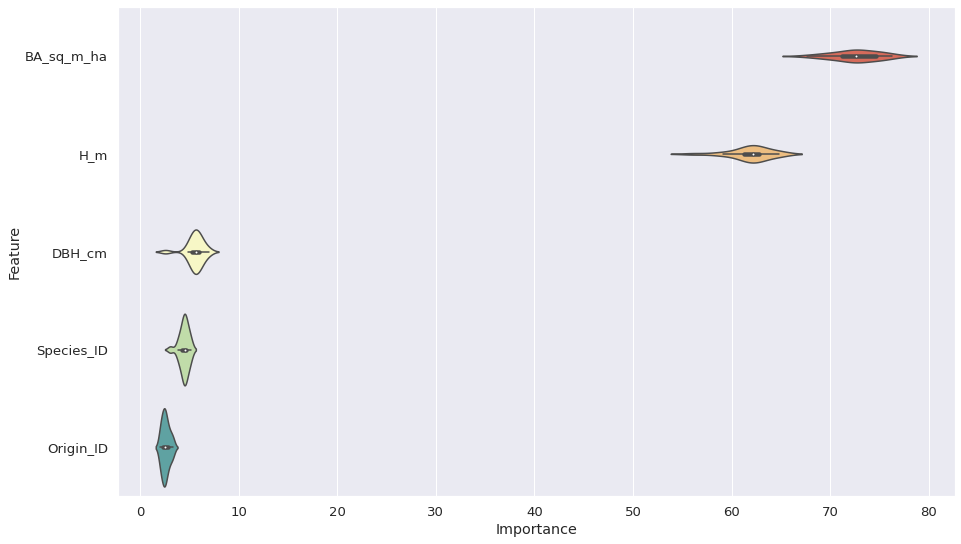

In [33]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['BA_sq_m_ha', 'H_m', 'DBH_cm', 'Species_ID', 'Origin_ID'])
sns.set(rc={'figure.figsize':(15,9)})
plt.show()

In [34]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)



In [35]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 117.0, median: 114.5,
 pred. interval (P(0.025)-P(0.975)): 34.975-171.0, 
 conf. interval (p-value=0.95): 88.319-151.684 
***
Aggregate bias statistic: 
 mean: 1.003, median: 0.836,
 pred. interval (P(0.025)-P(0.975)): -0.95-4.1, 
 conf. interval (p-value=0.95): 0.012-1.651 
***
Aggregate RMSE statistic: 
 mean: 23.778, median: 23.788, pred. interval (P(0.025)-P(0.975)): 19.035-26.954, 
 conf. interval (p-value=0.95): 22.521-25.97 
***
Aggregate MSE statistic: 
 mean: 569.986, median: 565.954, pred. interval (P(0.025)-P(0.975)): 363.254-726.623, 
 conf. interval (p-value=0.95): 507.393-675.027 
***
Aggregate R^2 statistic: 
 mean: 0.971, median: 0.973, pred. interval (P(0.025)-P(0.975)): 0.96-0.981, 
 conf. interval (p-value=0.95): 0.966-0.975 
***
Aggregate bias(%) statistic: 
 mean: 0.441, median: 0.836, pred. interval (P(0.025)-P(0.975)): -0.402-1.831, 
 conf. interval (p-value=0.95): 0.005-0.676 
***
Aggregate RMSE(%) statis